In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pylab as pl

In [2]:
df = pd.read_csv('Salary_dataset.csv')

df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [3]:
cdf = df[['YearsExperience', 'Salary']]
cdf.head(10)

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0
5,3.0,56643.0
6,3.1,60151.0
7,3.3,54446.0
8,3.3,64446.0
9,3.8,57190.0


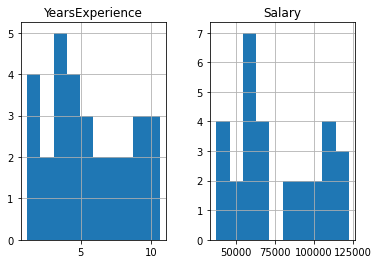

In [4]:
chrt = cdf[['YearsExperience', 'Salary']]
chrt.hist()
plt.show()

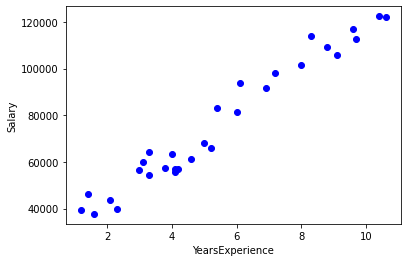

In [6]:
plt.scatter(cdf.YearsExperience, cdf.Salary, color="blue")
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.show()

In [7]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [9]:
print(msk)
print(~msk)

[ True  True  True  True  True  True False  True  True False  True  True
  True  True  True False  True  True  True  True  True  True  True False
  True False  True  True  True  True]
[False False False False False False  True False False  True False False
 False False False  True False False False False False False False  True
 False  True False False False False]


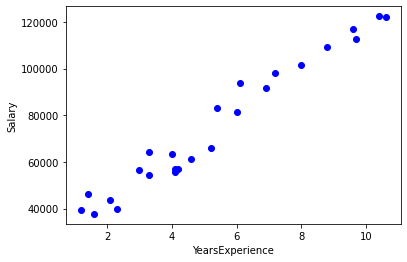

In [10]:
plt.scatter(train.YearsExperience, train.Salary, color='blue')
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.show()

In [19]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
trainx = np.asanyarray(train[['YearsExperience']])
trainy = np.asanyarray(train[['Salary']])
reg.fit (trainx, trainy)

print(reg.coef_)
print(reg.intercept_)

[[9425.86059607]]
[24834.47818653]


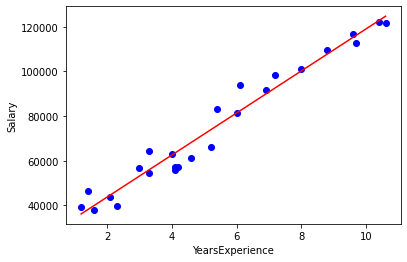

In [21]:
plt.scatter(train.YearsExperience, train.Salary, color='blue')
plt.plot(trainx, reg.coef_[0][0]*trainx + reg.intercept_[0], '-r')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()

In [22]:
from sklearn.metrics import r2_score

testx = np.asanyarray(test[['YearsExperience']])
testy = np.asanyarray(test[['Salary']])
testy_ = reg.predict(testx)

print("Mean absolute error: %.2f" % np.mean(np.absolute(testy_ - testy)))
print("Residual sum of squares (MSE): %.2f" % np.mean((testy_ - testy) ** 2))
print("R2-score: %.2f" % r2_score(testy , testy_) )

Mean absolute error: 5870.91
Residual sum of squares (MSE): 41210953.98
R2-score: 0.93
